In [1]:
import pickle
from shared.DTFE_utilities import DTFE, load_results, GRF, Zeldovich
import numpy as np
import matplotlib.pyplot as plt

In [3]:
L = 128
sigma = 8
gamma = 1

In [5]:
grf = GRF(L, gamma, sigma)
points, velocities = Zeldovich(grf, 20)
m = np.ones(len(points))

In [6]:
dtfe = DTFE(points, velocities, m)

Delaunay Tesselation Field Estimator initialization:
	-Evaluate Delaunay tessellation
	-Evaluate density estimate
	-Evaluate gradients


In [7]:
def densPlot(data, imageSize):
    X = np.arange(0, data.shape[0])
    Y = np.arange(0, data.shape[1])
    X, Y = np.meshgrid(X, Y)

    plt.figure(figsize=(imageSize, imageSize))
    plt.pcolormesh(X, Y, data, shading='auto')
    plt.axis("equal")
    plt.show()

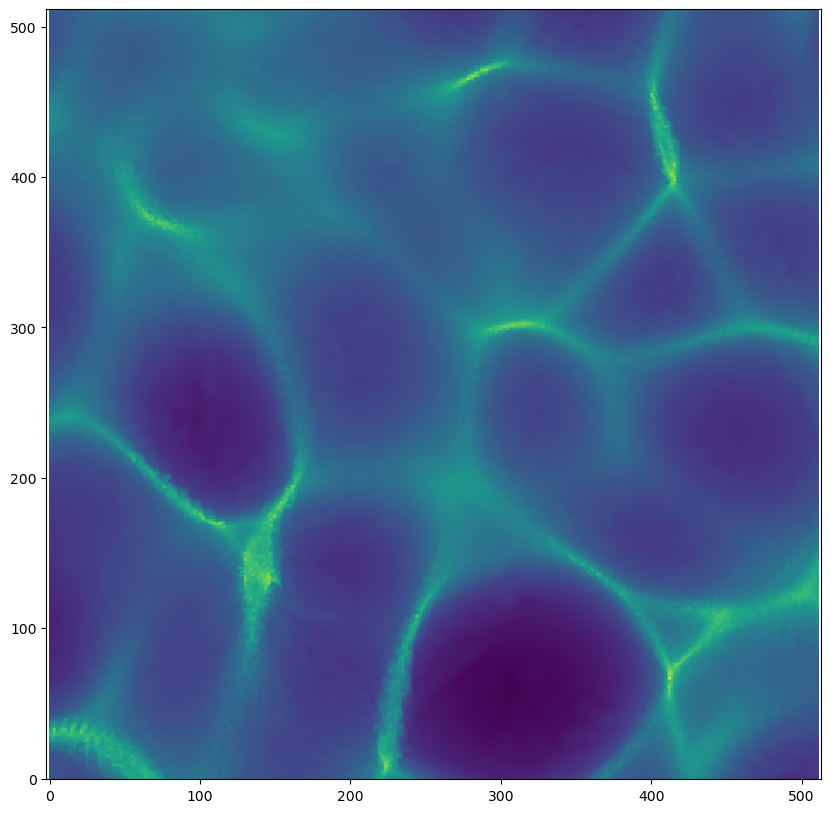

CPU times: user 31.8 s, sys: 422 ms, total: 32.2 s
Wall time: 32.4 s


In [8]:
%%time
n = int(4 * L)
X, Y = np.meshgrid(np.arange(0.1 * L, 0.9 * L, 0.8 * L / n),   
                   np.arange(0.1 * L, 0.9 * L, 0.8 * L / n))

dens  = dtfe.density(X.flat, Y.flat, np.full_like(X, int(L / 2)).flat).reshape((n,n))
densPlot(np.log(dens), 10)

In [10]:
def save_results(path, data):
    print(f"I'm saving the results and stuff to: {path}")
    filename = f"{path}.pickle"
    
    with open(filename, "wb") as f:
        pickle.dump(data, f)

In [12]:
save_results("/Users/users/nastase/PROJECT/DATA/Data/W6_DTFE/GaussianField.pickle",dtfe)

I'm saving the results and stuff to: /Users/users/nastase/PROJECT/DATA/Data/W6_DTFE/GaussianField.pickle
